In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
visits = pd.read_csv('/datasets/visits_log.csv')
orders = pd.read_csv('/datasets/orders_log.csv')
costs = pd.read_csv('/datasets/costs.csv')

**1. Обзор и предработка исходных данных**

In [3]:
# Таблица visits
visits.head()

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168


In [4]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
Device       359400 non-null object
End Ts       359400 non-null object
Source Id    359400 non-null int64
Start Ts     359400 non-null object
Uid          359400 non-null uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


In [5]:
# Проверим дубликаты
visits.duplicated().sum()

0

In [6]:
# Меняем названия столбцов и приводит даты в порядок
visits.columns.to_list()

['Device', 'End Ts', 'Source Id', 'Start Ts', 'Uid']

In [7]:
visits.columns = ['device', 'end_ts', 'source_id', 'start_ts', 'uid']

In [8]:
visits = visits[['device', 'source_id', 'uid', 'start_ts', 'end_ts']]

In [9]:
visits['end_ts'] = pd.to_datetime(visits['end_ts'], format = '%Y-%m-%d %H:%M:%S')
visits['start_ts'] = pd.to_datetime(visits['start_ts'], format = '%Y-%m-%d %H:%M:%S')

In [10]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
device       359400 non-null object
source_id    359400 non-null int64
uid          359400 non-null uint64
start_ts     359400 non-null datetime64[ns]
end_ts       359400 non-null datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(1), uint64(1)
memory usage: 13.7+ MB


In [11]:
# Таблица orders
orders.head()

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450


In [12]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
Buy Ts     50415 non-null object
Revenue    50415 non-null float64
Uid        50415 non-null uint64
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


In [13]:
# Проверим дубликаты
orders.duplicated().sum()

0

In [14]:
# Меняем названия столбцов и приводит даты в порядок
orders.columns.to_list()

['Buy Ts', 'Revenue', 'Uid']

In [15]:
orders.columns = ['purchase_ts', 'revenue', 'uid']

In [16]:
orders = orders[['uid', 'revenue', 'purchase_ts']]

In [17]:
orders['purchase_ts'] = pd.to_datetime(orders['purchase_ts'], format = '%Y-%m-%d %H:%M:%S')

In [18]:
orders.head(5)

,uid,revenue,purchase_ts
0,10329302124590727494,17.00,2017-06-01 00:10:00
1,11627257723692907447,0.55,2017-06-01 00:25:00
2,17903680561304213844,0.37,2017-06-01 00:27:00
3,16109239769442553005,0.55,2017-06-01 00:29:00
4,14200605875248379450,0.37,2017-06-01 07:58:00


In [19]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
uid            50415 non-null uint64
revenue        50415 non-null float64
purchase_ts    50415 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB


In [20]:
# Таблица costs
costs.head()

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08


In [21]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
dt           2542 non-null object
costs        2542 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


In [22]:
# Проверим дубликаты
costs.duplicated().sum()

0

In [23]:
# Меняем названия столбцов и приводит даты в порядок
costs.columns.to_list()

['source_id', 'dt', 'costs']

In [24]:
costs.columns = ['source_id', 'date', 'costs']

In [25]:
costs = costs[['source_id', 'costs', 'date']]

In [26]:
costs['date'] = pd.to_datetime(costs['date'], format = '%Y-%m-%d')

In [27]:
costs.head(10)

,source_id,costs,date
0,1,75.20,2017-06-01
1,1,62.25,2017-06-02
2,1,36.53,2017-06-03
3,1,55.00,2017-06-04
4,1,57.08,2017-06-05
5,1,40.39,2017-06-06
6,1,40.59,2017-06-07
7,1,56.63,2017-06-08
8,1,40.16,2017-06-09
9,1,43.24,2017-06-10


In [28]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
source_id    2542 non-null int64
costs        2542 non-null float64
date         2542 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB


Данные хорошие, пропусков и дубликатов нет. Даты обработаны

**2. Расчёт метрик**

**2.1 Продуктовые метрики**

**2.1.1. Рассчет DAU, WAU и MAU. Вычисление средние значения этих метрик за весь период. Визуализация изменения показателей**

Добавим в датафрейм visits следующие столбцы: номер дня недели, номер месяца и имя месяца

In [29]:
visits['date'] = visits['start_ts'].dt.date
visits['day_number'] = visits['start_ts'].dt.day
visits['month'] = visits['start_ts'].dt.month
visits['year'] = visits['start_ts'].dt.year
visits['week_number'] = visits['start_ts'].dt.week
visits['day_of_week'] = visits['start_ts'].dt.day_name()
visits['month_name'] = visits['start_ts'].dt.month_name()

In [30]:
visits.head()

,device,source_id,uid,start_ts,end_ts,date,day_number,month,year,week_number,day_of_week,month_name
0,touch,4,16879256277535980062,2017-12-20 17:20:00,2017-12-20 17:38:00,2017-12-20,20,12,2017,51,Wednesday,December
1,desktop,2,104060357244891740,2018-02-19 16:53:00,2018-02-19 17:21:00,2018-02-19,19,2,2018,8,Monday,February
2,touch,5,7459035603376831527,2017-07-01 01:54:00,2017-07-01 01:54:00,2017-07-01,1,7,2017,26,Saturday,July
3,desktop,9,16174680259334210214,2018-05-20 10:59:00,2018-05-20 11:23:00,2018-05-20,20,5,2018,20,Sunday,May
4,desktop,3,9969694820036681168,2017-12-27 14:06:00,2017-12-27 14:06:00,2017-12-27,27,12,2017,52,Wednesday,December


Рассчитаем DAU, WAU, MAU, их среднее значение. Визаулизируем DAU, WAU, MAU.

In [31]:
DAU_mean = visits.groupby('date').agg({'uid': 'nunique'}).mean().round()
print("Ежедневная аудитория DAU в среднем {0:.2f} человек".format(DAU_mean[0]))

Ежедневная аудитория DAU в среднем 908.00 человек


In [32]:
DAU = visits.groupby(['year','date']).agg({'uid': 'nunique'})

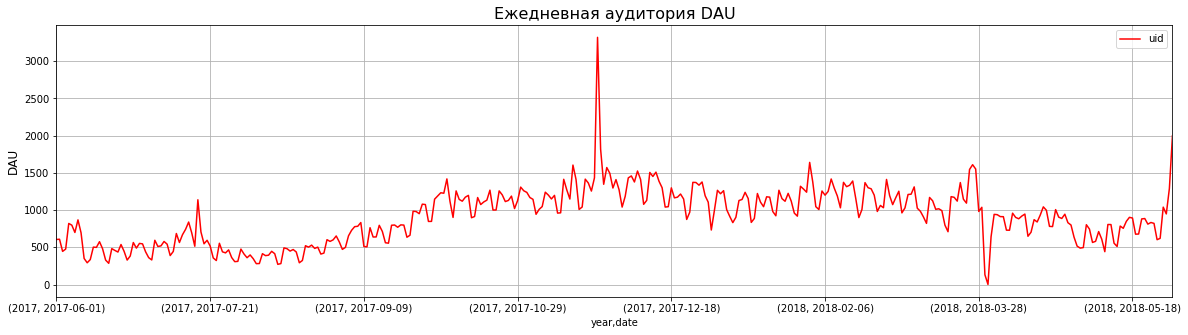

In [33]:
fig, ax = plt.subplots()
ax.set_title('Ежедневная аудитория DAU', fontsize = 16)
ax.set_ylabel('DAU', fontsize = 12)
DAU.plot(kind = 'line', figsize = (20,5), ax=ax, color = 'r', grid = True);

In [34]:
WAU_mean = visits.groupby('week_number').agg({'uid': 'nunique'}).mean().round()
print("Еженедельная аудитория WAU в среднем {0:.2f} человек".format(WAU_mean[0]))

Еженедельная аудитория WAU в среднем 5825.00 человек


In [35]:
WAU = visits.groupby(['year','week_number']).agg({'uid': 'nunique'})

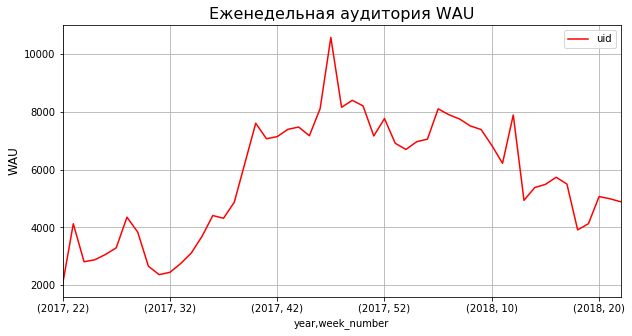

In [36]:
fig, ax = plt.subplots()
ax.set_title('Еженедельная аудитория WAU', fontsize = 16)
ax.set_ylabel('WAU', fontsize = 12)
WAU.plot(kind = 'line', figsize = (10,5), ax=ax, color = 'r', grid = True);

In [37]:
MAU_mean = visits.groupby('month').agg({'uid': 'nunique'}).mean().round()
print("Ежемесячная аудитория MAU в среднем {0:.2f} человек".format(MAU_mean[0]))

Ежемесячная аудитория MAU в среднем 23228.00 человек


In [38]:
MAU = visits.groupby(['year', 'month']).agg({'uid': 'nunique'})

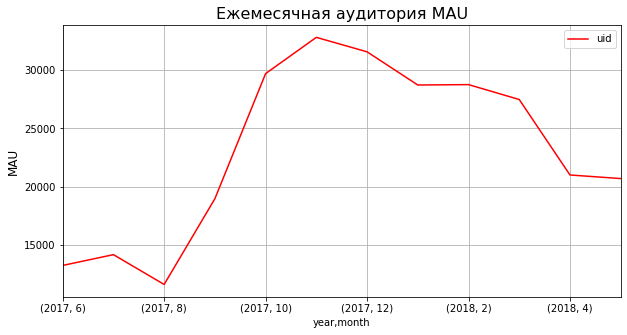

In [39]:
fig, ax = plt.subplots()
ax.set_title('Ежемесячная аудитория MAU', fontsize = 16)
ax.set_ylabel('MAU', fontsize = 12)
MAU.plot(kind = 'line', figsize = (10,5), ax=ax, color = 'r', grid = True);

Вывод по 2.1.1: Все три графика подтверждают одну закономерность - пиковая посещаемость приходится на декабрь

**2.1.2 Cколько раз за день пользователи в среднем заходят на сайт**

In [40]:
session_mean = visits.groupby('date').agg({'uid': 'count'}).mean()
print("Cреднее количество сессий в день {0:.2f} ".format(session_mean[0]))

Cреднее количество сессий в день 987.36 


In [41]:
session = visits.groupby('date').agg({'uid': 'count'})
session.columns = ['session_count']

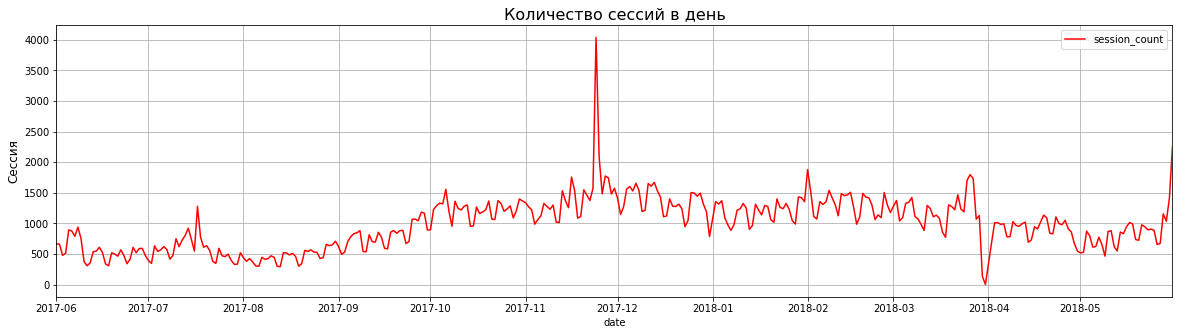

In [42]:
fig, ax = plt.subplots()
ax.set_title('Количество сессий в день', fontsize = 16)
ax.set_ylabel('Сессия', fontsize = 12)
session.plot(kind = 'line', figsize = (20,5), ax=ax, color = 'r', grid = True);

Добавим расчёты по среднему:

In [43]:
unique_users = visits.groupby('date').agg({'uid': 'nunique'})
unique_users.columns = ['unique_users']

session_mean2 = pd.merge(unique_users, session, on ='date')
session_mean2['mean_per_day'] = (session_mean2['session_count'] / session_mean2['unique_users']).round(2)
session_mean2.head()

,unique_users,session_count,mean_per_day
date,,,
2017-06-01,605,664,1.10
2017-06-02,608,658,1.08
2017-06-03,445,477,1.07
2017-06-04,476,510,1.07
2017-06-05,820,893,1.09


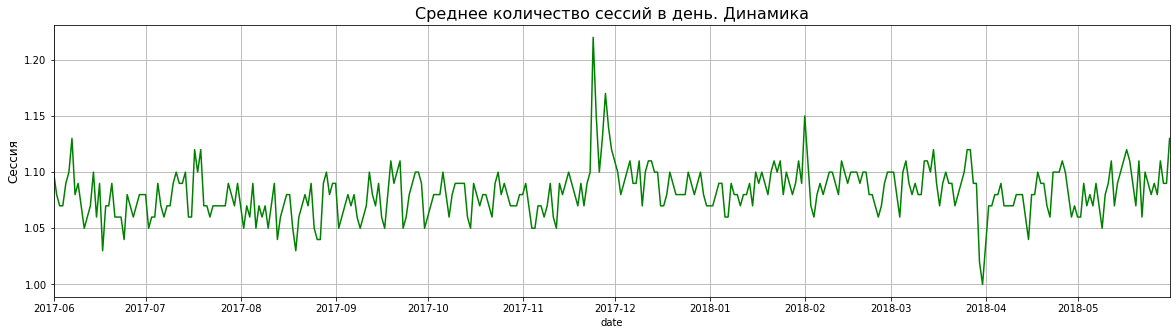

In [44]:
fig, ax = plt.subplots()
ax.set_title('Среднее количество сессий в день. Динамика', fontsize = 16)
ax.set_ylabel('Сессия', fontsize = 12)
session_mean2['mean_per_day'].plot(kind = 'line', figsize = (20,5), ax=ax, color = 'green', grid = True);

In [45]:
mean_total = session_mean2['mean_per_day'].mean()
mean_total.round(2) #Сколько раз пользователи в среднем заходят на сайт

1.08

Вывод по 2.1.2: Среднее значение визитов в день от 1 до 1.1. На графике видна цикличность, предположу что в выходные дни среднее количество заходов на сайт - меньше. Характерная картина - в месяц по 4 провала. Все одыхают. Виден явный пик активности в декабре: период новогодних праздников. Непонятно "яма" в конце марта 2018 года. Допущу элемент случайности. Возмжно сервера на были доступны в течении дня.

**2.1.3 Расчёт времени нахождения пользоваетлей на сайте. Продолжительность типичной пользовательской сессии за весь период.**

Найдем длинну сессии в минутах и построим гистограмму:

In [46]:
visits['session_duration_minunes'] = (visits['end_ts'] - visits['start_ts']).dt.total_seconds() / 60

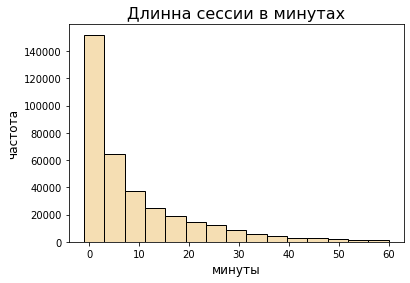

In [47]:
fig, ax = plt.subplots()
visits['session_duration_minunes'].hist(bins=15, range=(-1, 60), ec='black', color='wheat', grid = False, ax=ax)
ax.set_title('Длинна сессии в минутах', fontsize = 16)
ax.set_ylabel('частота', fontsize = 12);
ax.set_xlabel('минуты', fontsize = 12);

Распределение не похоже на нормальное, используем моду

In [48]:
mode_time = visits['session_duration_minunes'].mode()
print("Cредняя длинна сессии - {0:.2f} минут(а)".format(mode_time[0]))

Cредняя длинна сессии - 1.00 минут(а)


Вывод по 2.1.3: Чаще всего клиенты проводят на сайте 1 минуту. Этого времени достаточно для оформления заказа

**2.1.4 Расчёт Retention Rate**

Определим дату первого визита и объеденим с исходным датафреймом

In [49]:
first_visit = visits.groupby(['uid'])['start_ts'].min().reset_index()
first_visit.columns = ['uid', 'first_visit']

In [50]:
visits = visits.merge(first_visit)
visits.head()

,device,source_id,uid,start_ts,end_ts,date,day_number,month,year,week_number,day_of_week,month_name,session_duration_minunes,first_visit
0,touch,4,16879256277535980062,2017-12-20 17:20:00,2017-12-20 17:38:00,2017-12-20,20,12,2017,51,Wednesday,December,18.0,2017-12-20 17:20:00
1,desktop,2,104060357244891740,2018-02-19 16:53:00,2018-02-19 17:21:00,2018-02-19,19,2,2018,8,Monday,February,28.0,2018-02-19 16:53:00
2,touch,5,7459035603376831527,2017-07-01 01:54:00,2017-07-01 01:54:00,2017-07-01,1,7,2017,26,Saturday,July,0.0,2017-07-01 01:54:00
3,desktop,9,16174680259334210214,2018-05-20 10:59:00,2018-05-20 11:23:00,2018-05-20,20,5,2018,20,Sunday,May,24.0,2018-03-09 20:05:00
4,desktop,4,16174680259334210214,2018-03-09 20:05:00,2018-03-09 20:33:00,2018-03-09,9,3,2018,10,Friday,March,28.0,2018-03-09 20:05:00


Отформатируем по datetime:

In [51]:
visits['first_visit_month'] = visits['first_visit'].astype('datetime64[M]')
visits['visit_month'] = visits['start_ts'].astype('datetime64[M]')

Рассчитаем lifetime:

In [52]:
visits['lifetime'] = (visits['visit_month'] - visits['first_visit_month']) / np.timedelta64(1, 'M')
visits['lifetime'] = visits['lifetime'].round().astype('int')

Найдём исходное количество пользователей в когорте:

In [53]:
cohort_visits = visits.groupby(['first_visit_month', 'lifetime']).agg({'uid': 'nunique'}).reset_index()
uid = cohort_visits[cohort_visits['lifetime'] == 0][['first_visit_month', 'uid']]
uid.columns = ['first_visit_month', 'f_uid']
uid.head(12)

,first_visit_month,f_uid
0,2017-06-01,13259
12,2017-07-01,13140
23,2017-08-01,10181
33,2017-09-01,16704
42,2017-10-01,25977
50,2017-11-01,27248
57,2017-12-01,25268
63,2018-01-01,22624
68,2018-02-01,22197
72,2018-03-01,20589


Найдем Retention Rate, сформируем pivot_table:

In [54]:
cohort_visits = cohort_visits.merge(uid)

In [55]:
cohort_visits['retention_rate'] = cohort_visits['uid'] / cohort_visits['f_uid']
cohort_visits['first_visit_month'] = cohort_visits['first_visit_month'].dt.strftime('%Y-%m')   ######

In [56]:
visits_retention_pivot = cohort_visits.pivot_table(index = 'first_visit_month', 
                                                   columns = 'lifetime', values = 'retention_rate', aggfunc = 'sum')

In [57]:
visits_retention_pivot.fillna('')

lifetime,0,1,2,3,4,5,6,7,8,9,10,11
first_visit_month,,,,,,,,,,,,
2017-06,1.0,0.0786635,0.0537748,0.0613923,0.0685572,0.0714232,0.0610152,0.0577721,0.0523418,0.0508334,0.0406516,0.0449506
2017-07,1.0,0.0560883,0.0512938,0.0561644,0.0582192,0.0481735,0.0453577,0.0457382,0.0388128,0.0286149,0.0274734,
2017-08,1.0,0.076908,0.0628622,0.062764,0.0500933,0.0440035,0.0363422,0.0394853,0.0278951,0.0260289,,
2017-09,1.0,0.0854885,0.069205,0.0507064,0.0393918,0.0378352,0.0358597,0.0241858,0.0228089,,,
2017-10,1.0,0.078608,0.0522385,0.0389575,0.0342611,0.0322208,0.0213651,0.0203642,,,,
2017-11,1.0,0.078281,0.0441133,0.0386817,0.0337272,0.0234146,0.0217998,,,,,
2017-12,1.0,0.0558018,0.0379927,0.0311065,0.0202628,0.0190359,,,,,,
2018-01,1.0,0.0597153,0.0393388,0.0249735,0.020244,,,,,,,
2018-02,1.0,0.0570798,0.0254539,0.0200928,,,,,,,,


Построим heatmap:

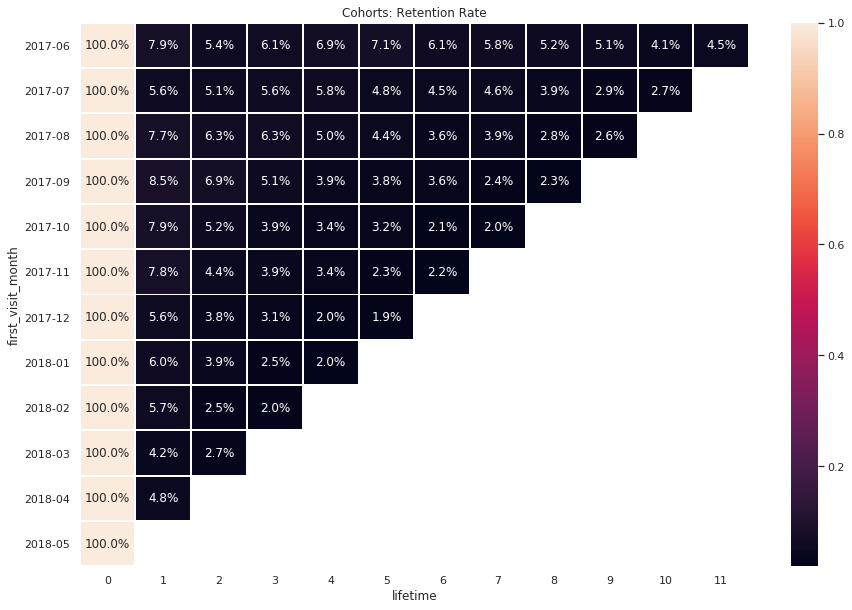

In [58]:
sns.set(style='white')
plt.figure(figsize=(15, 10))
plt.title('Cohorts: Retention Rate')
sns.heatmap(visits_retention_pivot, annot=True, fmt='.1%', linewidths=1, linecolor='white'); 

Средний Retention rate:

In [59]:
(visits_retention_pivot.mean() * 100).round(2)

lifetime
0     100.00
1       6.52
2       4.63
3       4.28
4       4.06
5       3.94
6       3.70
7       3.75
8       3.55
9       3.52
10      3.41
11      4.50
dtype: float64

Вывод по пункту 2.1.4:

Retention rate очень мал, 90-95 % клиентов не возвращаются к предлагаемым услугам

**2.2 Метрики электронной коммерции**

**2.2.1 Сколько времени в среднем проходит с момента первого посещения сайта до совершения покупки**

Объеденим таблицы orders и visits. Попутно найдем дату первого визита и покупки.

In [60]:
first_visit = visits.groupby('uid').agg({'start_ts':'min'}).reset_index()
first_visit.columns=['uid', 'first_visit_date']

In [61]:
first_visit.head()

,uid,first_visit_date
0,11863502262781,2018-03-01 17:27:00
1,49537067089222,2018-02-06 15:55:00
2,297729379853735,2017-06-07 18:47:00
3,313578113262317,2017-09-18 22:49:00
4,325320750514679,2017-09-30 14:29:00


In [62]:
first_order = orders.groupby('uid').agg({'purchase_ts':'min'}).reset_index()
first_order.columns = ['uid', 'first_purchase_date']

In [63]:
first_order.head()

,uid,first_purchase_date
0,313578113262317,2018-01-03 21:51:00
1,1575281904278712,2017-06-03 10:13:00
2,2429014661409475,2017-10-11 18:33:00
3,2464366381792757,2018-01-28 15:54:00
4,2551852515556206,2017-11-24 10:14:00


In [64]:
buying_time = first_visit.merge(first_order, on='uid', how='inner')
buying_time.head()

,uid,first_visit_date,first_purchase_date
0,313578113262317,2017-09-18 22:49:00,2018-01-03 21:51:00
1,1575281904278712,2017-06-03 10:13:00,2017-06-03 10:13:00
2,2429014661409475,2017-10-11 17:14:00,2017-10-11 18:33:00
3,2464366381792757,2018-01-27 20:10:00,2018-01-28 15:54:00
4,2551852515556206,2017-11-24 10:14:00,2017-11-24 10:14:00


Добавим столбец с временем покупки в минутах:

In [65]:
buying_time['buying_time'] = (buying_time['first_purchase_date'] - buying_time['first_visit_date']).dt.seconds / 60
buying_time.head()

,uid,first_visit_date,first_purchase_date,buying_time
0,313578113262317,2017-09-18 22:49:00,2018-01-03 21:51:00,1382.0
1,1575281904278712,2017-06-03 10:13:00,2017-06-03 10:13:00,0.0
2,2429014661409475,2017-10-11 17:14:00,2017-10-11 18:33:00,79.0
3,2464366381792757,2018-01-27 20:10:00,2018-01-28 15:54:00,1184.0
4,2551852515556206,2017-11-24 10:14:00,2017-11-24 10:14:00,0.0


Построим гисторгамму:

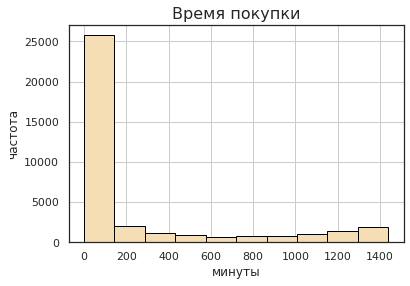

In [66]:
fig, ax = plt.subplots()
buying_time['buying_time'].hist(color = 'wheat', ec = 'black')
ax.set_title('Время покупки', fontsize = 16)
ax.set_ylabel('частота', fontsize = 12);
ax.set_xlabel('минуты', fontsize = 12);

In [67]:
buying_time['buying_time'].describe()

count    36523.000000
mean       249.164691
std        429.742785
min          0.000000
25%          4.000000
50%         16.000000
75%        252.000000
max       1439.000000
Name: buying_time, dtype: float64

In [68]:
mode_time2 = buying_time['buying_time'].mode()
print("Cредняя время покупки (мода) - {0:.2f} минут(а)".format(mode_time2[0]))

Cредняя время покупки (мода) - 1.00 минут(а)


Вывод по 2.2.1: в среднем время клиентам нужно 249 минут от первого визита до покупки. Если брать время по моде, то это одна минута

**2.2.2 Среднее количество покупок на одного покупателя за определённый период**

Найдем  данные за весь период анализа. Сгруппируем

In [69]:
orders_and_visits = orders.merge(first_visit)

In [70]:
orders_and_visits.head()

,uid,revenue,purchase_ts,first_visit_date
0,10329302124590727494,17.00,2017-06-01 00:10:00,2017-06-01 00:09:00
1,11627257723692907447,0.55,2017-06-01 00:25:00,2017-06-01 00:14:00
2,17903680561304213844,0.37,2017-06-01 00:27:00,2017-06-01 00:25:00
3,16109239769442553005,0.55,2017-06-01 00:29:00,2017-06-01 00:14:00
4,14200605875248379450,0.37,2017-06-01 07:58:00,2017-06-01 07:31:00


In [71]:
orders_and_visits['purchase_date'] = orders_and_visits['purchase_ts'].dt.date
orders_and_visits['purchases_week'] = orders_and_visits['purchase_ts'].dt.week
orders_and_visits['purchase_month'] = orders_and_visits['purchase_ts'].dt.month
orders_and_visits['purchase_year'] = orders_and_visits['purchase_ts'].dt.year

Сгруппируем и сосчитаем заказы по временным отрезкам (день, неделя, год):

In [72]:
purchases_per_day = orders_and_visits.groupby('purchase_date')['uid'].count()
purchases_per_week = orders_and_visits.groupby(['purchases_week'])['uid'].count()
purchases_per_month = orders_and_visits.groupby(['purchase_month'])['uid'].count()
purchases_per_year = orders_and_visits.groupby(['purchase_year'])['uid'].count()

Объеденим в общий датафрейм и выведем метод describe:

In [73]:
orders2 = pd.DataFrame()

In [74]:
orders2['per_day'] = purchases_per_day.describe()

In [75]:
orders2['per_week'] = purchases_per_week.describe()

In [76]:
orders2['per_month'] = purchases_per_month.describe()

In [77]:
orders2['per_year'] = purchases_per_year.describe()

In [78]:
orders2.head(10)

,per_day,per_week,per_month,per_year
count,364.000000,52.000000,12.000000,2.000000
mean,138.502747,969.519231,4201.250000,25207.500000
std,76.858480,397.630457,1511.861052,3195.415544
min,1.000000,314.000000,1807.000000,22948.000000
25%,82.750000,658.500000,3045.500000,24077.750000
50%,136.000000,997.500000,4533.500000,25207.500000
75%,177.000000,1270.500000,5409.250000,26337.250000
max,814.000000,1894.000000,6218.000000,27467.000000


In [79]:
orders['buy_dt'] = orders['purchase_ts'].dt.date ###
orders.head()

,uid,revenue,purchase_ts,buy_dt
0,10329302124590727494,17.00,2017-06-01 00:10:00,2017-06-01
1,11627257723692907447,0.55,2017-06-01 00:25:00,2017-06-01
2,17903680561304213844,0.37,2017-06-01 00:27:00,2017-06-01
3,16109239769442553005,0.55,2017-06-01 00:29:00,2017-06-01
4,14200605875248379450,0.37,2017-06-01 07:58:00,2017-06-01


In [80]:
orders33 = orders.groupby('buy_dt').agg({'uid': 'nunique'}) ### считаем уникальных пользователей
orders33.columns = ['unique_users']

In [81]:
orders44 = orders.groupby('buy_dt').agg({'purchase_ts': 'count'}) ### считаем количество заказов
orders44.columns = ['purchase_count']

In [82]:
orders55 = pd.merge(orders33, orders44, on='buy_dt')  ### среднее количество заказов на уникального пользователя
orders55['purchase_mean'] = (orders55['purchase_count'] / orders55['unique_users']).round(2)
orders55.head()

,unique_users,purchase_count,purchase_mean
buy_dt,,,
2017-06-01,86,96,1.12
2017-06-02,101,111,1.10
2017-06-03,61,67,1.10
2017-06-04,59,66,1.12
2017-06-05,146,161,1.10


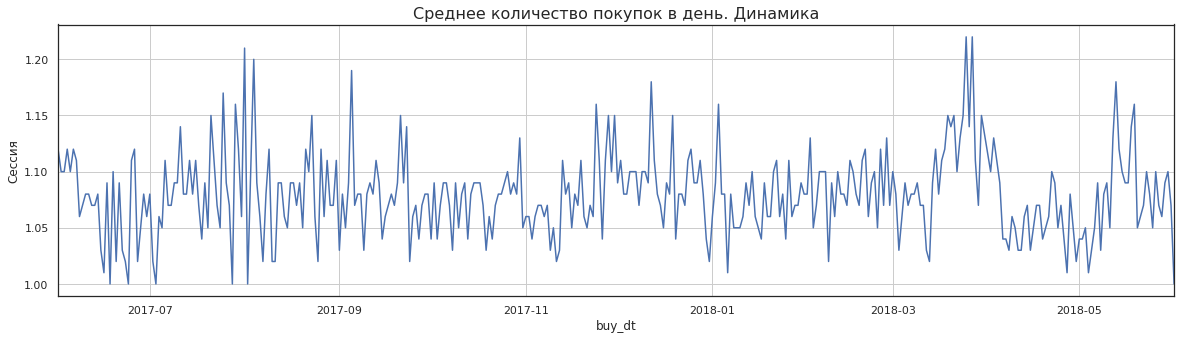

In [83]:
fig, ax = plt.subplots()
ax.set_title('Среднее количество покупок в день. Динамика', fontsize = 16)
ax.set_ylabel('Сессия', fontsize = 12)
orders55['purchase_mean'].plot(kind = 'line', figsize = (20,5), ax=ax, color = 'b', grid = True);

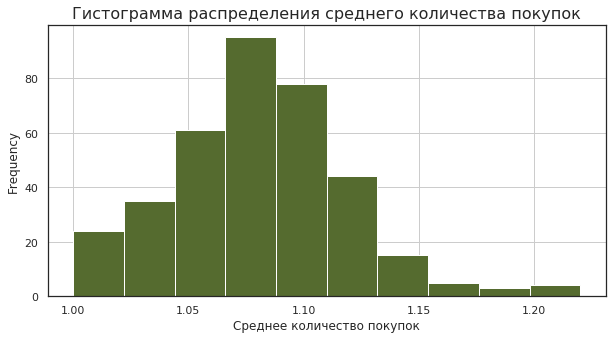

In [84]:
fig, ax = plt.subplots()
ax.set_title('Гистограмма распределения среднего количества покупок', fontsize = 16)
ax.set_ylabel('Частота', fontsize = 12)
ax.set_xlabel('Среднее количество покупок', fontsize = 12)
orders55['purchase_mean'].plot(kind = 'hist', bins=10, figsize = (10,5), ax=ax, color = 'darkolivegreen', grid = True, ec='white');

Распределение похоже на нормальное.

In [85]:
orders_mean55 = orders55['purchase_mean'].mean()
orders_mean55.round(2) # расчёт среднего числа покупок

1.08

Найдем динамику среднего количетва покупок по когортам:

In [86]:
orders_v2 = orders  ## скопирую, чтобы не поплыл код снизу. Проект с большим количеством правок. Не хочу попасть в одинаковую переменную
costs_v2 = costs

In [87]:
orders_v2['order_month'] = orders_v2['purchase_ts'].astype('datetime64[M]')
costs_v2['month'] = costs_v2['date'].astype('datetime64[M]') 


In [88]:
first_orders_v2 = orders_v2.groupby('uid').agg({'order_month': 'min'}).reset_index()
first_orders_v2.columns = ['uid', 'first_order_month']
first_orders_v2['first_order_month'] = first_orders_v2['first_order_month'] ########
first_orders_v2.head()

,uid,first_order_month
0,313578113262317,2018-01-01
1,1575281904278712,2017-06-01
2,2429014661409475,2017-10-01
3,2464366381792757,2018-01-01
4,2551852515556206,2017-11-01


In [89]:
cohort_sizes_v2 = (first_orders_v2.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index())
cohort_sizes_v2.columns = ['first_order_month', 'n_buyers']
cohort_sizes_v2.head()

,first_order_month,n_buyers
0,2017-06-01,2023
1,2017-07-01,1923
2,2017-08-01,1370
3,2017-09-01,2581
4,2017-10-01,4340


In [90]:
orders_new_v2 = pd.merge(orders_v2,first_orders_v2, on='uid')
orders_new_v2.head()

,uid,revenue,purchase_ts,buy_dt,order_month,first_order_month
0,10329302124590727494,17.00,2017-06-01 00:10:00,2017-06-01,2017-06-01,2017-06-01
1,11627257723692907447,0.55,2017-06-01 00:25:00,2017-06-01,2017-06-01,2017-06-01
2,17903680561304213844,0.37,2017-06-01 00:27:00,2017-06-01,2017-06-01,2017-06-01
3,16109239769442553005,0.55,2017-06-01 00:29:00,2017-06-01,2017-06-01,2017-06-01
4,14200605875248379450,0.37,2017-06-01 07:58:00,2017-06-01,2017-06-01,2017-06-01


In [91]:
cohorts_v2 = (orders_new_v2.groupby(['first_order_month', 'order_month']).agg({'purchase_ts': 'count'}).reset_index())
cohorts_v2.head()  ##заменил деньги на число покупок, как в рекомендациях 

,first_order_month,order_month,purchase_ts
0,2017-06-01,2017-06-01,2354
1,2017-06-01,2017-07-01,177
2,2017-06-01,2017-08-01,174
3,2017-06-01,2017-09-01,226
4,2017-06-01,2017-10-01,292


In [92]:
report_v2 = pd.merge(cohort_sizes_v2, cohorts_v2, on='first_order_month')
report_v2.head()

,first_order_month,n_buyers,order_month,purchase_ts
0,2017-06-01,2023,2017-06-01,2354
1,2017-06-01,2023,2017-07-01,177
2,2017-06-01,2023,2017-08-01,174
3,2017-06-01,2023,2017-09-01,226
4,2017-06-01,2023,2017-10-01,292


In [93]:
report_v2['purchase_mean'] = report_v2['purchase_ts'] / report_v2['n_buyers']
report_v2['age'] = (report_v2['order_month'] - report_v2['first_order_month']) / np.timedelta64(1, 'M')
report_v2['age'] = report_v2['age'].round().astype('int')
report_v2['first_order_month'] = report_v2['first_order_month'].dt.strftime('%Y-%m') ####
report_v2.head()

,first_order_month,n_buyers,order_month,purchase_ts,purchase_mean,age
0,2017-06,2023,2017-06-01,2354,1.163618,0
1,2017-06,2023,2017-07-01,177,0.087494,1
2,2017-06,2023,2017-08-01,174,0.086011,2
3,2017-06,2023,2017-09-01,226,0.111715,3
4,2017-06,2023,2017-10-01,292,0.144340,4


In [94]:
purchase_mean_v2 = report_v2.pivot_table(index='first_order_month', columns='age', values='purchase_mean', aggfunc='mean')
purchase_mean_v2.fillna('')

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06,1.163618,0.0874938,0.0860109,0.111715,0.14434,0.107761,0.136431,0.0860109,0.104795,0.0756303,0.0474543,0.0425111
2017-07,1.136765,0.0520021,0.0624025,0.0540822,0.0374415,0.0426417,0.0317213,0.026001,0.0301612,0.0124805,0.0275611,
2017-08,1.118978,0.0788321,0.0729927,0.0591241,0.0620438,0.0452555,0.0357664,0.0569343,0.0335766,0.0335766,,
2017-09,1.136381,0.0848508,0.0623789,0.0635413,0.0259589,0.0422317,0.0418442,0.021697,0.0236343,,,
2017-10,1.143779,0.0723502,0.0373272,0.0281106,0.0297235,0.0237327,0.0198157,0.0288018,,,,
2017-11,1.179368,0.0972801,0.0445969,0.051703,0.0333252,0.0144572,0.0249939,,,,,
2017-12,1.152635,0.0616016,0.0460872,0.0408396,0.0196213,0.0239562,,,,,,
2018-01,1.121554,0.0664097,0.047139,0.0189742,0.0231248,,,,,,,
2018-02,1.121611,0.0608053,0.0227335,0.0191728,,,,,,,,


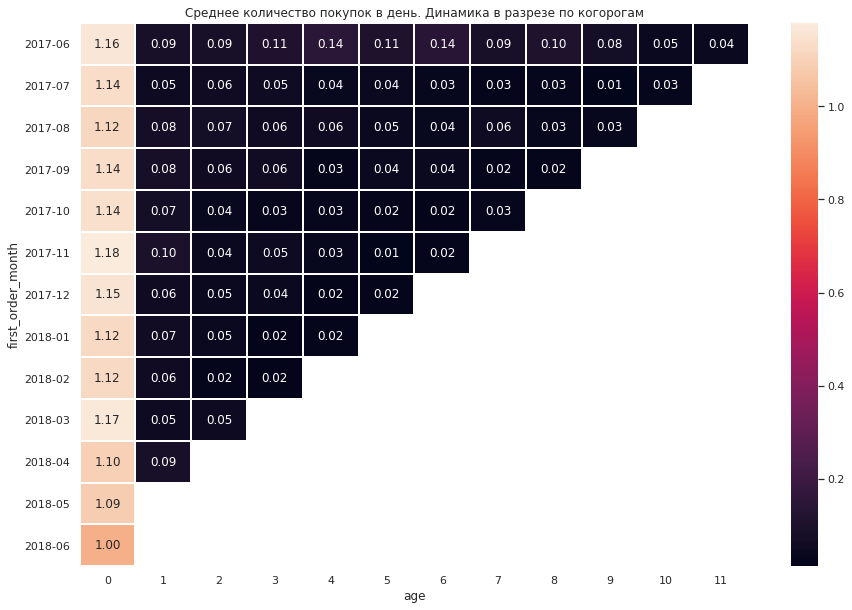

In [95]:
sns.set(style='white')
plt.figure(figsize=(15, 10))
plt.title('Среднее количество покупок в день. Динамика в разрезе по когорогам')
sns.heatmap(purchase_mean_v2, annot=True, fmt ='.2f', linewidths=1, linecolor='white'); 

Вывод по 2.2.2: в среднем за день покупают 138 раз, в неделю - 969, в месяц 4201 раз. Среднее количество покупок в день: 1.08. Лучшая по этом показателю когорта - первая

**2.2.3 Расчёт среднего чека**

Используем получившийся датафрейм orders_and_visits для расчёта:

In [96]:
orders_and_visits.head()

,uid,revenue,purchase_ts,first_visit_date,purchase_date,purchases_week,purchase_month,purchase_year
0,10329302124590727494,17.00,2017-06-01 00:10:00,2017-06-01 00:09:00,2017-06-01,22,6,2017
1,11627257723692907447,0.55,2017-06-01 00:25:00,2017-06-01 00:14:00,2017-06-01,22,6,2017
2,17903680561304213844,0.37,2017-06-01 00:27:00,2017-06-01 00:25:00,2017-06-01,22,6,2017
3,16109239769442553005,0.55,2017-06-01 00:29:00,2017-06-01 00:14:00,2017-06-01,22,6,2017
4,14200605875248379450,0.37,2017-06-01 07:58:00,2017-06-01 07:31:00,2017-06-01,22,6,2017


In [97]:
mean_revenue = orders_and_visits.groupby(['purchase_year','purchase_month']).agg({'revenue': 'mean'})

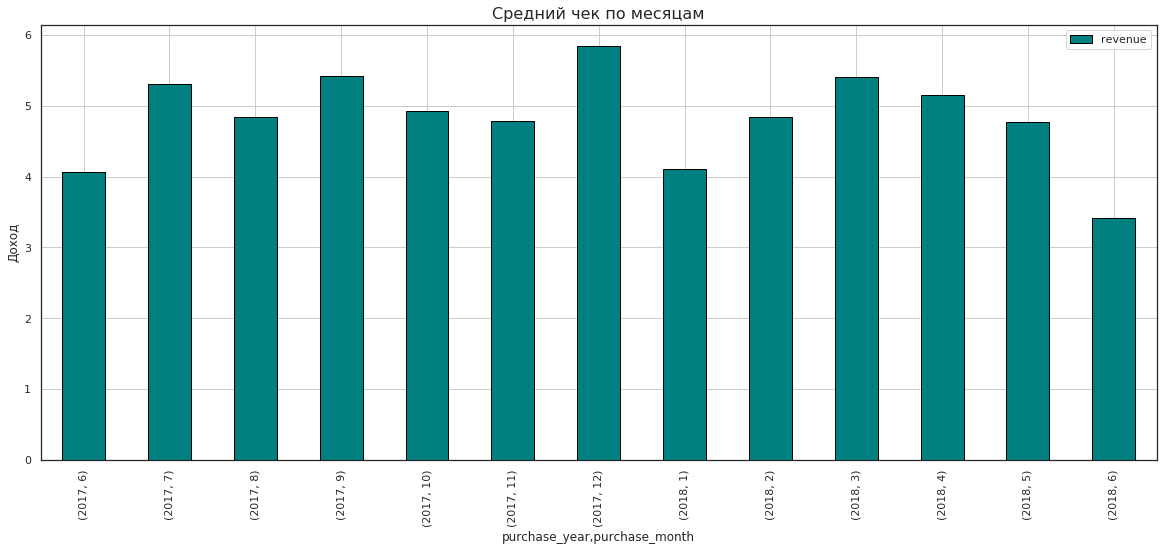

In [98]:
fig, ax = plt.subplots()
ax.set_title('Cредний чек по месяцам', fontsize = 16)
ax.set_ylabel('Доход', fontsize = 12)
mean_revenue.plot(kind = 'bar', figsize = (20,8), ax=ax, color = 'teal', grid = True, ec='black');

Приблизим для более четкой картины:

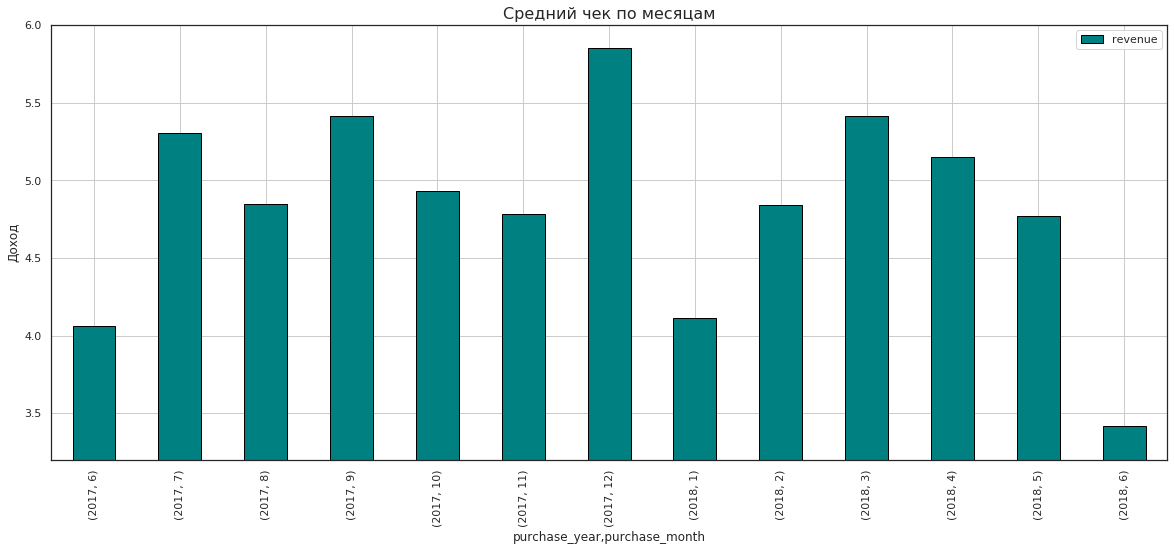

In [99]:
fig, ax = plt.subplots()
ax.set_title('Cредний чек по месяцам', fontsize = 16)
ax.set_ylabel('Доход', fontsize = 12)
mean_revenue.plot(kind = 'bar', figsize = (20,8), ax=ax, color = 'teal', grid = True, ec='black', ylim =(3.2, 6));

Вывод по 2.2.3: Без неожиданностей. Доход максимален в декабре - период трат на подарки к новому году.

In [100]:
mean_revenue2 = orders_and_visits['revenue'].mean().round(2)
mean_revenue2 #Расчёт среднего чека за весь период

5.0

**2.2.4 Расчёт LTV**

Посмотрим еще раз на orders и visits:

In [101]:
orders.head()

,uid,revenue,purchase_ts,buy_dt,order_month
0,10329302124590727494,17.00,2017-06-01 00:10:00,2017-06-01,2017-06-01
1,11627257723692907447,0.55,2017-06-01 00:25:00,2017-06-01,2017-06-01
2,17903680561304213844,0.37,2017-06-01 00:27:00,2017-06-01,2017-06-01
3,16109239769442553005,0.55,2017-06-01 00:29:00,2017-06-01,2017-06-01
4,14200605875248379450,0.37,2017-06-01 07:58:00,2017-06-01,2017-06-01


In [102]:
orders['purchase_ts'].describe()

count                   50415
unique                  45991
top       2018-05-31 10:13:00
freq                        9
first     2017-06-01 00:10:00
last      2018-06-01 00:02:00
Name: purchase_ts, dtype: object

In [103]:
costs.head()

,source_id,costs,date,month
0,1,75.20,2017-06-01,2017-06-01
1,1,62.25,2017-06-02,2017-06-01
2,1,36.53,2017-06-03,2017-06-01
3,1,55.00,2017-06-04,2017-06-01
4,1,57.08,2017-06-05,2017-06-01


In [104]:
costs['date'].describe()

count                    2542
unique                    364
top       2018-03-03 00:00:00
freq                        7
first     2017-06-01 00:00:00
last      2018-05-31 00:00:00
Name: date, dtype: object

Выделим месяцы из дат в таблицах с заказами и расходами:

In [105]:
orders['order_month'] = orders['purchase_ts'].astype('datetime64[M]')
costs['month'] = costs['date'].astype('datetime64[M]')   ###

Получим месяц первой покупки каждого покупателя:

In [106]:
first_orders = orders.groupby('uid').agg({'order_month': 'min'}).reset_index()
first_orders.columns = ['uid', 'first_order_month']
first_orders['first_order_month'] = first_orders['first_order_month'] ########

Посчитаем количество новых покупателей (n_buyers) за каждый месяц:

In [107]:
cohort_sizes = (first_orders.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index())
cohort_sizes.columns = ['first_order_month', 'n_buyers']

Построим когорты. Добавим месяц первой покупки каждого покупателя в таблицу с заказами:

In [108]:
orders_new = pd.merge(orders,first_orders, on='uid')

Сгруппируем таблицу заказов по месяцу первой покупки и месяцу каждого заказа и сложим выручку:

In [109]:
cohorts = (orders_new.groupby(['first_order_month', 'order_month']).agg({'revenue': 'sum'}).reset_index())

 Добавим в таблицу cohorts данные о том, сколько людей первый раз совершили покупку в каждый месяц:

In [110]:
report = pd.merge(cohort_sizes, cohorts, on='first_order_month')

Найдем валовую прибыль, умножив выручку на маржинальность

In [111]:
margin_rate = 1 #(условие задачи - 100%)

report['gp'] = report['revenue'] * margin_rate
report['age'] = (report['order_month'] - report['first_order_month']) / np.timedelta64(1, 'M')
report['age'] = report['age'].round().astype('int')

найдём LTV

In [112]:
report['ltv'] = report['gp'] / report['n_buyers']
#report['first_order_month'] = report['first_order_month'].dt.strftime('%Y-%m') ######### !!!!!! 

In [113]:
output = report.pivot_table(index='first_order_month', columns='age', values='ltv', aggfunc='mean')
ltv = output.cumsum(axis=1)
ltv.fillna('') 

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,4.724414,5.20974,5.64738,6.60205,7.62458,8.36008,9.31052,9.89212,10.4453,11.0511,11.6224,11.8792
2017-07-01,6.010218,6.34543,6.96896,7.32794,7.50473,7.66077,7.78098,7.9228,8.08404,8.23118,8.38685,
2017-08-01,5.276518,5.74851,6.20699,6.59827,7.09232,7.37586,7.58653,7.99153,8.28374,8.47172,,
2017-09-01,5.644529,6.76212,7.28305,11.2588,11.6594,12.3065,13.0081,13.2512,13.4352,,,
2017-10-01,5.003733,5.5395,5.73089,5.88803,6.03959,6.15996,6.24477,6.36024,,,,
2017-11-01,5.154683,5.55392,5.75347,6.07842,6.22644,6.28032,6.39524,,,,,
2017-12-01,4.738191,4.99856,5.92366,6.98894,7.30187,7.63991,,,,,,
2018-01-01,4.135636,4.43039,4.73468,4.87745,4.94015,,,,,,,
2018-02-01,4.156987,4.43526,4.51378,4.58792,,,,,,,,


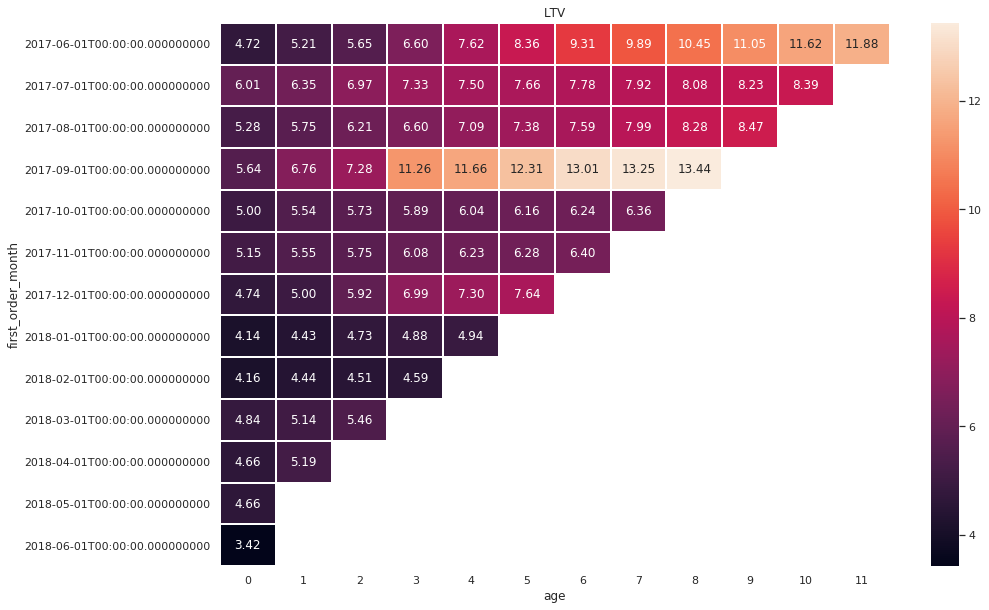

In [114]:
sns.set(style='white')
plt.figure(figsize=(15, 10))
plt.title('LTV')
sns.heatmap(ltv, annot=True, fmt ='.2f', linewidths=1, linecolor='white'); 

Исключим когорты, жившие менее полугода. Cредний LTV по когортам за 6 месяцев:

In [115]:
ltv_mean = ltv.mean().round(2)
ltv_mean

age
0      4.80
1      5.40
2      5.82
3      6.69
4      7.30
5      7.97
6      8.39
7      9.08
8     10.06
9      9.25
10    10.00
11    11.88
dtype: float64

Вывод по 2.2.4: Средний LTV на 6 месяц жизни когорт равен 7.97. В расчёт не включены когорты с liftime менее полугода.

**2.3 Маркетинговые метрики** 

**2.3.1 Общая сумма расходов за месяц**

Еще раз посмотрим на расходы:

In [116]:
costs.sample(10)

,source_id,costs,date,month
1580,5,209.63,2017-10-07,2017-10-01
941,3,594.16,2018-01-02,2018-01-01
1831,9,7.96,2017-06-16,2017-06-01
1578,5,195.54,2017-10-05,2017-10-01
1321,4,363.74,2018-01-19,2018-01-01
1991,9,29.16,2017-11-23,2017-11-01
474,2,80.13,2017-09-20,2017-09-01
299,1,108.24,2018-03-27,2018-03-01
1716,5,168.85,2018-02-20,2018-02-01
1982,9,18.84,2017-11-14,2017-11-01


Сгруппируем по источнику перехода на сайт, добаим процент от общей стоимости.

In [117]:
source_costs = costs.groupby('source_id')['costs'].sum().reset_index()
source_costs['percent'] = source_costs['costs'] / (costs['costs'].sum())
source_costs.sort_values('percent', ascending = False)

,source_id,costs,percent
2,3,141321.63,0.429377
3,4,61073.60,0.185560
4,5,51757.10,0.157254
1,2,42806.04,0.130058
0,1,20833.27,0.063298
6,10,5822.49,0.017690
5,9,5517.49,0.016764


Сгруппируем расходы по месяцам:

In [118]:
###costs['month'] = costs['date'].astype('datetime64[M]').dt.month ###
##costs['year'] = costs['date'].astype('datetime64[M]').dt.year
costs_by_period = costs.groupby('month').agg({'costs': 'sum'})

Визуализируем:

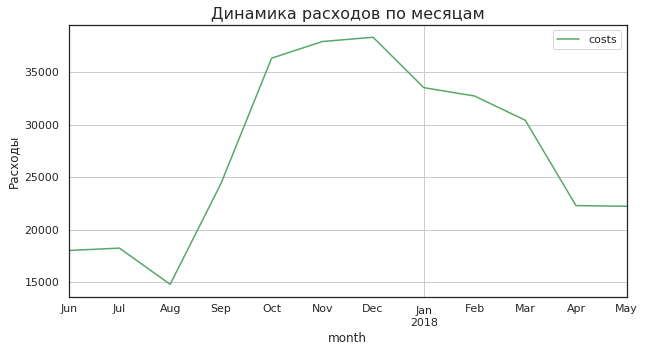

In [119]:
fig, ax = plt.subplots()
ax.set_title('Динамика расходов по месяцам', fontsize = 16)
ax.set_ylabel('Расходы', fontsize = 12)
costs_by_period.plot(kind = 'line', figsize = (10,5), ax=ax, color = 'g', grid = True);


Вывод по 2.3.1: больше всего тратили с октября по декабрь 2017 года

In [120]:
#Посмотрим на общие расходы
print(costs['costs'].sum())

329131.62


In [121]:
costs_by_source = costs.groupby('source_id').agg({'costs':'sum'}) # Сумма расходов в разбивке по источникам
costs_by_source.reset_index()

,source_id,costs
0,1,20833.27
1,2,42806.04
2,3,141321.63
3,4,61073.60
4,5,51757.10
5,9,5517.49
6,10,5822.49


**2.3.2 Расчёт САС**

Объеденим в один датафрейм для расчёта САС данные из таблиц costs и visits:

In [122]:
visits_by_source = visits.query('start_ts == first_visit')
customers_by_source = (orders.merge(visits_by_source, on='uid', how='inner')).groupby('source_id').agg({'uid':'nunique'})
customers_by_source.columns=['customers']
customers_by_source.reset_index()

,source_id,customers
0,1,2899
1,2,3506
2,3,10473
3,4,10296
4,5,6931
5,7,1
6,9,1088
7,10,1329


In [123]:
cac = customers_by_source.join(costs_by_source)
cac.reset_index()

,source_id,customers,costs
0,1,2899,20833.27
1,2,3506,42806.04
2,3,10473,141321.63
3,4,10296,61073.60
4,5,6931,51757.10
5,7,1,NaN
6,9,1088,5517.49
7,10,1329,5822.49


NaN в 5 индексе заполним нулем, 1 покупатель - это несерьезно.

In [124]:
cac = cac.fillna(0)

In [125]:
cac['cac'] = cac['costs'] / cac['customers']
cac.sort_values('cac', ascending = False)

,customers,costs,cac
source_id,,,
3,10473,141321.63,13.493901
2,3506,42806.04,12.209367
5,6931,51757.10,7.467479
1,2899,20833.27,7.186364
4,10296,61073.60,5.931779
9,1088,5517.49,5.071222
10,1329,5822.49,4.381106
7,1,0.00,0.000000


In [126]:
#cac_plot = cac.drop(['customers', 'costs'], axis=1) #откинем лишние столбцы для построения графика

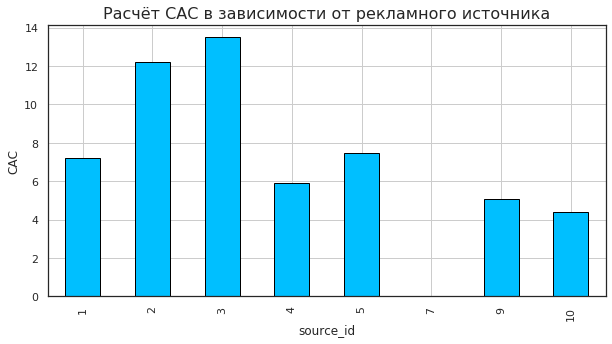

In [127]:
fig, ax = plt.subplots()
ax.set_title('Расчёт САС в зависимости от рекламного источника', fontsize = 16)
ax.set_ylabel('CAC', fontsize = 12)
cac['cac'].plot(kind = 'bar', figsize = (10,5), ax=ax, color = 'deepskyblue', ec='black', grid = True);

<div class="alert alert-block alert-info">
<b>Fixed:</b> 
Попробуем рассчитать:
</div>

In [128]:
orders['buy_dt'] = orders['purchase_ts'].dt.date  
visits['first_visit_dt'] = visits['start_ts'].dt.date

first_orders2 = orders.groupby('uid').agg({'purchase_ts': 'min'}).reset_index()
first_orders2.columns = ['uid', 'first_order_ts']
first_orders2['first_order_dt'] = first_orders2['first_order_ts'].dt.date
first_orders2['first_order_month'] = first_orders2['first_order_ts'].astype('datetime64[M]')

first_visits2 = visits.groupby('uid').agg({'start_ts': 'min'}).reset_index()
first_visits2.columns = ['uid', 'first_session_start_ts']
first_visits2['first_session_dt'] = first_visits2['first_session_start_ts'].dt.date
first_visits2['first_session_month'] = first_visits2['first_session_start_ts'].astype('datetime64[M]')


In [129]:
buyers = pd.merge(first_visits2, first_orders2, on = 'uid')
buyers.head()

,uid,first_session_start_ts,first_session_dt,first_session_month,first_order_ts,first_order_dt,first_order_month
0,313578113262317,2017-09-18 22:49:00,2017-09-18,2017-09-01,2018-01-03 21:51:00,2018-01-03,2018-01-01
1,1575281904278712,2017-06-03 10:13:00,2017-06-03,2017-06-01,2017-06-03 10:13:00,2017-06-03,2017-06-01
2,2429014661409475,2017-10-11 17:14:00,2017-10-11,2017-10-01,2017-10-11 18:33:00,2017-10-11,2017-10-01
3,2464366381792757,2018-01-27 20:10:00,2018-01-27,2018-01-01,2018-01-28 15:54:00,2018-01-28,2018-01-01
4,2551852515556206,2017-11-24 10:14:00,2017-11-24,2017-11-01,2017-11-24 10:14:00,2017-11-24,2017-11-01


In [130]:
buyers['first_order_dt'] = pd.to_datetime(buyers['first_order_dt'])
buyers['first_session_dt'] = pd.to_datetime(buyers['first_session_dt'])
buyers['days_to_first_purchase'] = ((buyers['first_order_ts'] - buyers['first_session_start_ts']) /  np.timedelta64(1,'D')).astype('int')

In [131]:
buyers.head()

,uid,first_session_start_ts,first_session_dt,first_session_month,first_order_ts,first_order_dt,first_order_month,days_to_first_purchase
0,313578113262317,2017-09-18 22:49:00,2017-09-18,2017-09-01,2018-01-03 21:51:00,2018-01-03,2018-01-01,106
1,1575281904278712,2017-06-03 10:13:00,2017-06-03,2017-06-01,2017-06-03 10:13:00,2017-06-03,2017-06-01,0
2,2429014661409475,2017-10-11 17:14:00,2017-10-11,2017-10-01,2017-10-11 18:33:00,2017-10-11,2017-10-01,0
3,2464366381792757,2018-01-27 20:10:00,2018-01-27,2018-01-01,2018-01-28 15:54:00,2018-01-28,2018-01-01,0
4,2551852515556206,2017-11-24 10:14:00,2017-11-24,2017-11-01,2017-11-24 10:14:00,2017-11-24,2017-11-01,0


In [132]:
#найдем первый реламный источник

users = visits.sort_values('start_ts').groupby('uid').first()
users = users[['source_id']]
buyers = pd.merge(buyers, users, left_on='uid', right_index = True)
buyers.head()

,uid,first_session_start_ts,first_session_dt,first_session_month,first_order_ts,first_order_dt,first_order_month,days_to_first_purchase,source_id
0,313578113262317,2017-09-18 22:49:00,2017-09-18,2017-09-01,2018-01-03 21:51:00,2018-01-03,2018-01-01,106,2
1,1575281904278712,2017-06-03 10:13:00,2017-06-03,2017-06-01,2017-06-03 10:13:00,2017-06-03,2017-06-01,0,10
2,2429014661409475,2017-10-11 17:14:00,2017-10-11,2017-10-01,2017-10-11 18:33:00,2017-10-11,2017-10-01,0,3
3,2464366381792757,2018-01-27 20:10:00,2018-01-27,2018-01-01,2018-01-28 15:54:00,2018-01-28,2018-01-01,0,5
4,2551852515556206,2017-11-24 10:14:00,2017-11-24,2017-11-01,2017-11-24 10:14:00,2017-11-24,2017-11-01,0,5


In [133]:
buyers_daily = buyers.groupby(['source_id','first_order_dt']).agg({'uid': 'count'}).reset_index()
buyers_daily.rename(columns={'uid' : 'n_buyers'}, inplace=True)
buyers_daily['first_order_dt'] = pd.to_datetime(buyers_daily['first_order_dt'])
buyers_daily.head()

,source_id,first_order_dt,n_buyers
0,1,2017-06-01,14
1,1,2017-06-02,7
2,1,2017-06-03,7
3,1,2017-06-04,3
4,1,2017-06-05,18


In [134]:
costs2 = pd.merge(buyers_daily, costs, left_on = ['source_id', 'first_order_dt'], right_on = ['source_id', 'date'])
costs2['costs_per_buyer'] = costs2['costs'] / costs2['n_buyers']
costs2.head()

,source_id,first_order_dt,n_buyers,costs,date,month,costs_per_buyer
0,1,2017-06-01,14,75.20,2017-06-01,2017-06-01,5.371429
1,1,2017-06-02,7,62.25,2017-06-02,2017-06-01,8.892857
2,1,2017-06-03,7,36.53,2017-06-03,2017-06-01,5.218571
3,1,2017-06-04,3,55.00,2017-06-04,2017-06-01,18.333333
4,1,2017-06-05,18,57.08,2017-06-05,2017-06-01,3.171111


In [135]:
cac_by_source2 = costs2.groupby('source_id')['costs_per_buyer'].mean() #Расчёт общего среднего САС по источникам
cac_by_source2.round(2)

source_id
1      9.49
2     16.29
3     15.58
4      7.27
5      8.34
9      6.84
10     6.56
Name: costs_per_buyer, dtype: float64

In [136]:
cac_mean2 = costs2['costs_per_buyer'].mean() #Расчёт общего среднего САС
cac_mean2.round(2)

10.19

In [137]:
costs2_graph = costs2.pivot_table(index='month', columns='source_id', values='costs_per_buyer', aggfunc='mean')
costs2_graph

source_id,1,2,3,4,5,9,10
month,,,,,,,
2017-06-01,11.681283,12.883568,16.716919,10.792094,9.209676,5.253654,4.590158
2017-07-01,9.491485,18.000253,18.593952,8.054482,7.938157,5.582433,6.151880
2017-08-01,12.118898,18.886449,19.795068,11.554926,6.879620,4.900254,5.813398
2017-09-01,8.155731,17.672249,13.084043,9.533800,6.864844,6.049126,8.306581
2017-10-01,8.202083,14.193003,14.613088,6.233562,6.305969,5.923235,6.362921
2017-11-01,8.908503,17.437690,16.091445,5.013132,9.368019,9.400503,10.801337
2017-12-01,8.570439,13.871086,12.948321,5.656507,8.399174,7.899420,7.803197
2018-01-01,11.719181,15.850151,15.134989,5.901092,9.371755,9.792713,9.851557
2018-02-01,10.752216,18.209325,13.894612,5.428068,7.725369,8.181382,4.489624


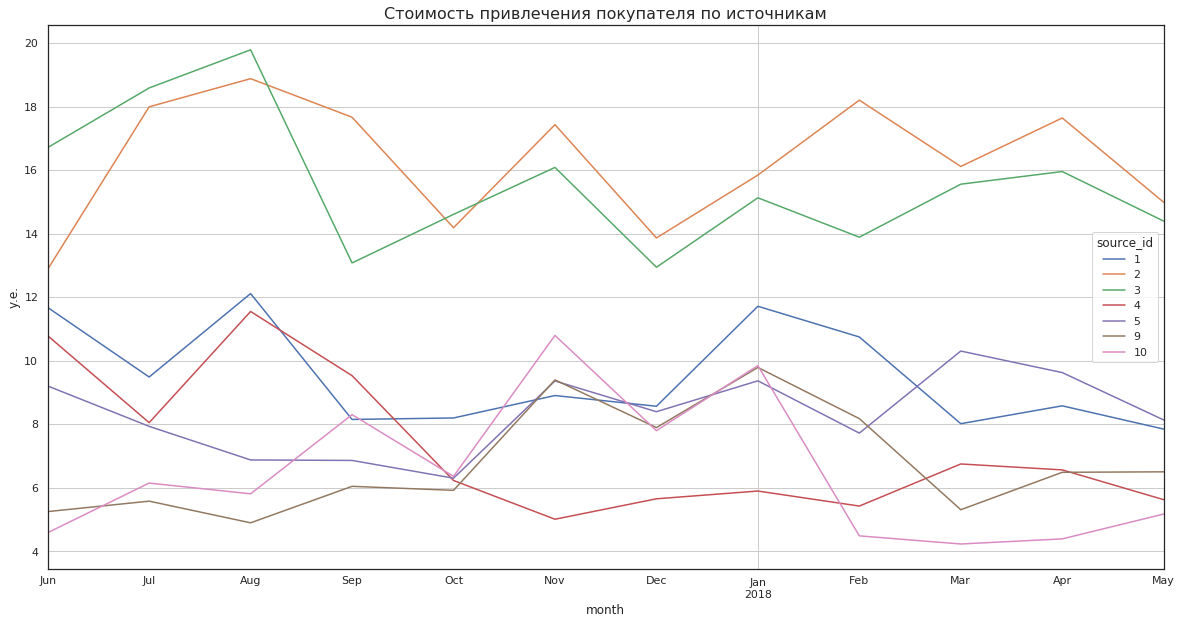

In [138]:
fig, ax = plt.subplots()
ax.set_title('Cтоимость привлечения покупателя по источникам', fontsize = 16)
ax.set_ylabel('у.е.', fontsize = 12)
costs2_graph.plot(kind = 'line', figsize = (20,10), ax=ax, grid = True);

Вывод по 2.3.2: Средняя стоимость привлечения клиента равна 10,2 у.е. Наибольшая стоимость привлечения клиентов приходится на источники 2 и 3.  16.3 и 15.6 у.е. соответственно. Эта динамика сохраняется на протяжении всего периода исследования.

**2.3.3 Расчёт ROMI**

Считаем расходы за месяц:

In [139]:
monthly_costs = costs.groupby('month').sum()

Добавим данные о расходах в отчёт и посчитаем CAC:

In [140]:
report_new = pd.merge(report, monthly_costs, left_on='first_order_month', right_on='month')

report_new['cac'] = report_new['costs'] / report_new['n_buyers'] 

Рассчитаем ROMI: поделим LTV на CAC

In [141]:
report_new['romi'] = report_new['ltv'] / report_new['cac']

output2 = report_new.pivot_table(index='first_order_month', columns='age', values='romi', aggfunc='mean')
romi = output2.cumsum(axis=1).round(2)

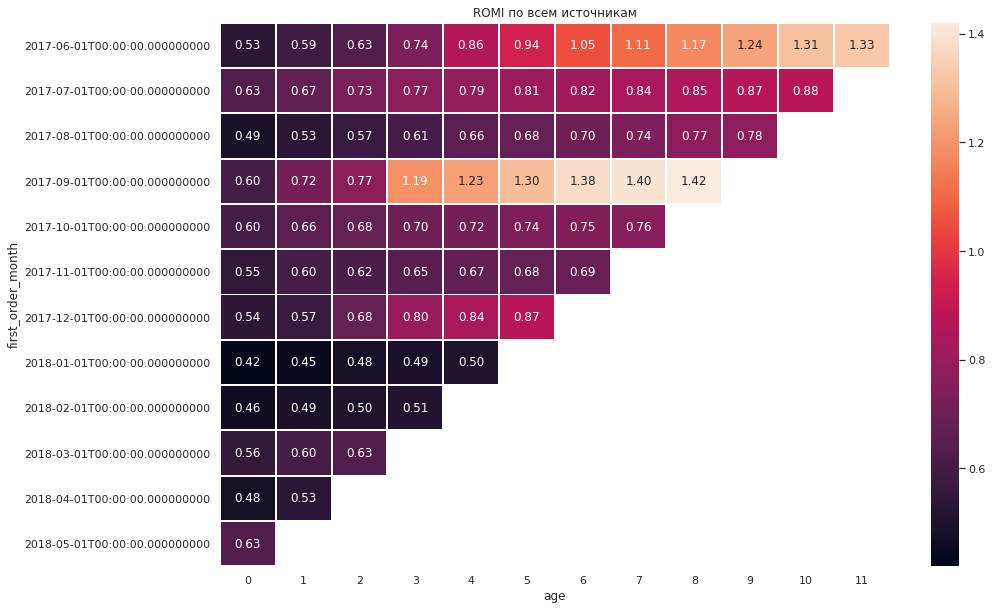

In [142]:
sns.set(style='white')
plt.figure(figsize=(15, 10))
plt.title('ROMI по всем источникам')
sns.heatmap(romi, annot=True, fmt ='.2f', linewidths=1, linecolor='white'); 

In [143]:
# средний romi
romi_mean = romi.mean().round(2)
romi_mean

age
0     0.54
1     0.58
2     0.63
3     0.72
4     0.78
5     0.86
6     0.90
7     0.97
8     1.05
9     0.96
10    1.10
11    1.33
dtype: float64

**Добавим вывод по ROMI по всем источникам:**  Окупились 1 и 4 когорты, 4 когорта окупилась фактически на 4 месяц своего существования. 1 когорота окупилась на 6й. Остальные когорты не достигли значения 1, а следовательно, не окупились

Посмотрим на какие источники находятся у нас в исходных данных:

In [144]:
visits['source_id'].unique()

array([ 4,  2,  5,  9,  3,  1, 10,  7,  6])

In [145]:
costs['source_id'].unique()

array([ 1,  2,  3,  4,  5,  9, 10])

Откинем источники № 6 и 7. Найдем ROMI по оставшимся источникам. Зациклим расчёты, которые использовали выше

-----------------------------------------------------------------------
Cредний ROMI по источнику № 1
age
0      2.27
1      2.90
2      3.39
3      4.53
4      5.32
5      6.17
6      7.28
7      8.28
8      9.68
9      8.20
10     9.91
11    14.09
dtype: float64
-----------------------------------------------------------------------
6.17 - Cредний ROMI по источнику № 1 на 6 месяц жизни когорт
-----------------------------------------------------------------------


-----------------------------------------------------------------------
Cредний ROMI по источнику № 2
age
0     1.20
1     1.44
2     1.75
3     2.42
4     2.86
5     3.34
6     3.57
7     4.12
8     4.81
9     4.04
10    4.92
11    6.87
dtype: float64
-----------------------------------------------------------------------
3.34 - Cредний ROMI по источнику № 2 на 6 месяц жизни когорт
-----------------------------------------------------------------------


--------------------------------------------------------------------

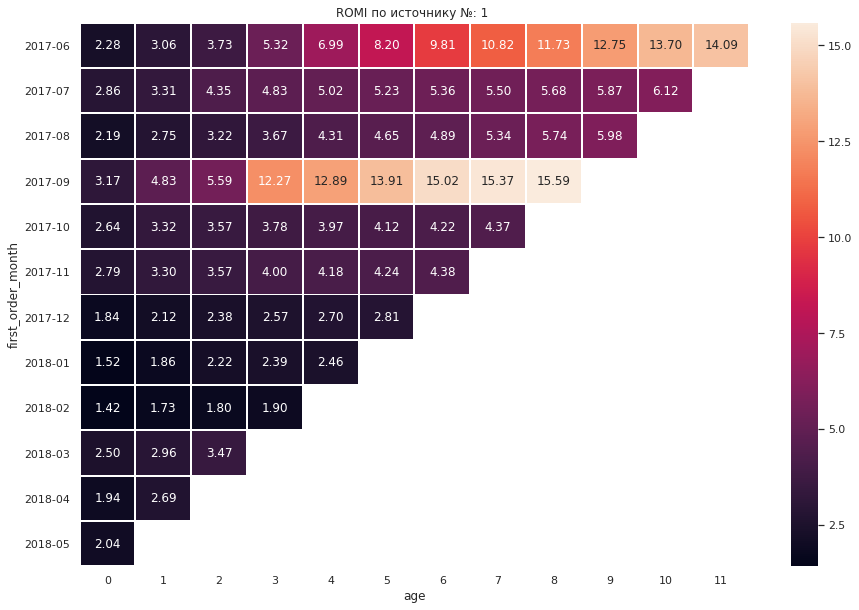

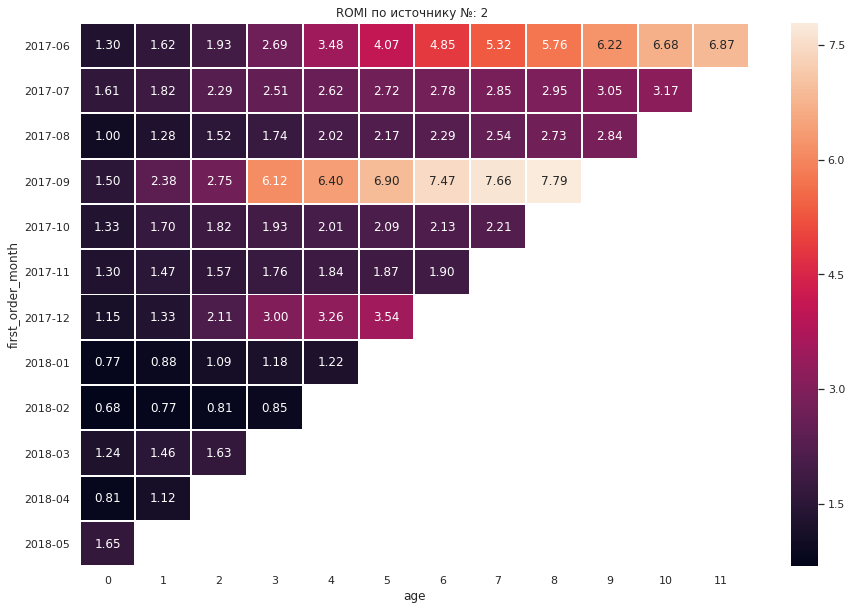

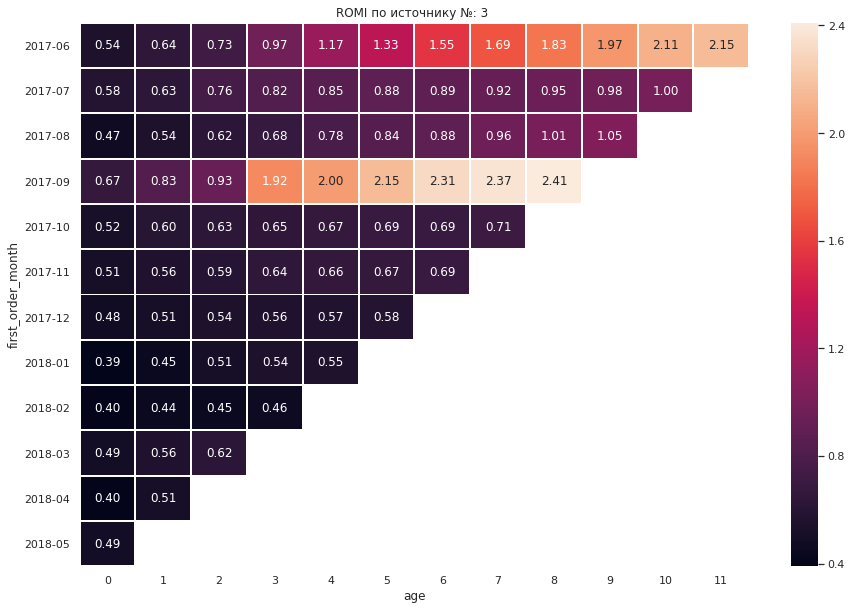

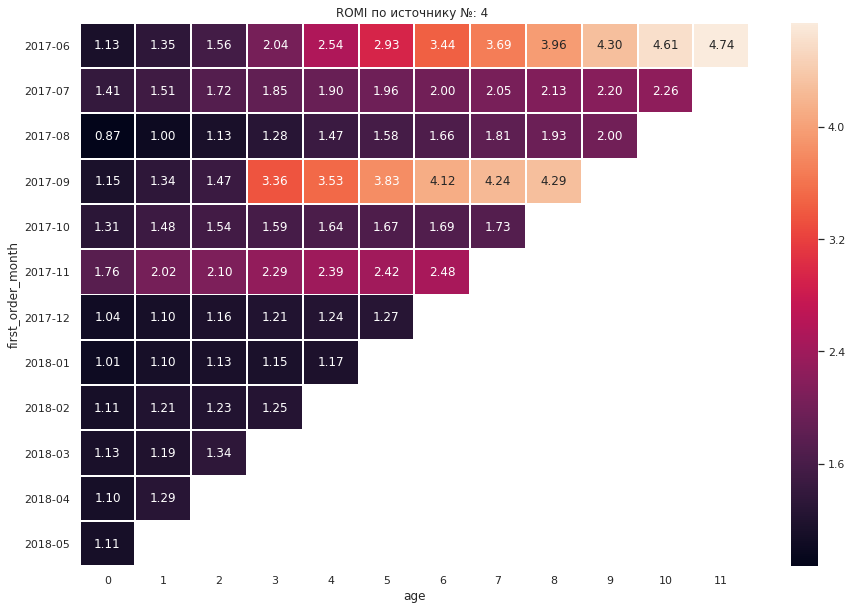

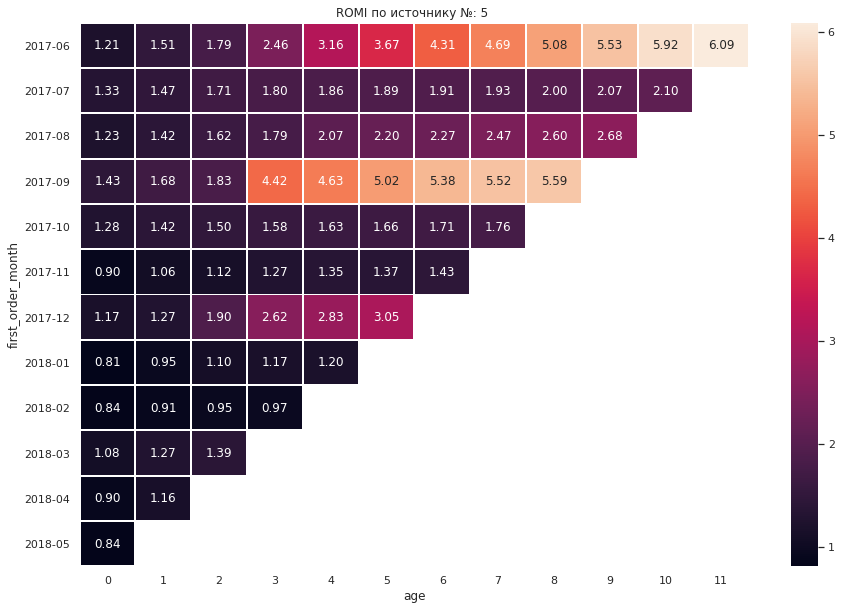

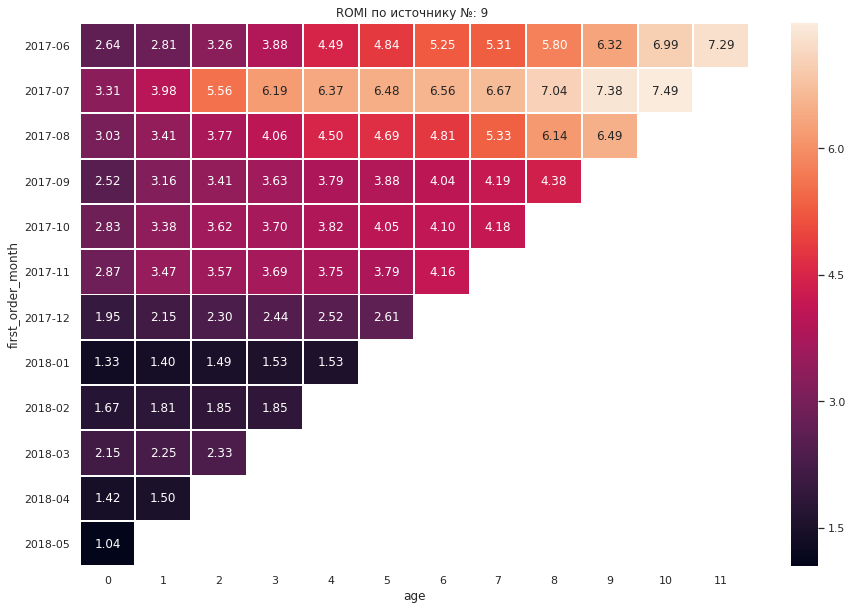

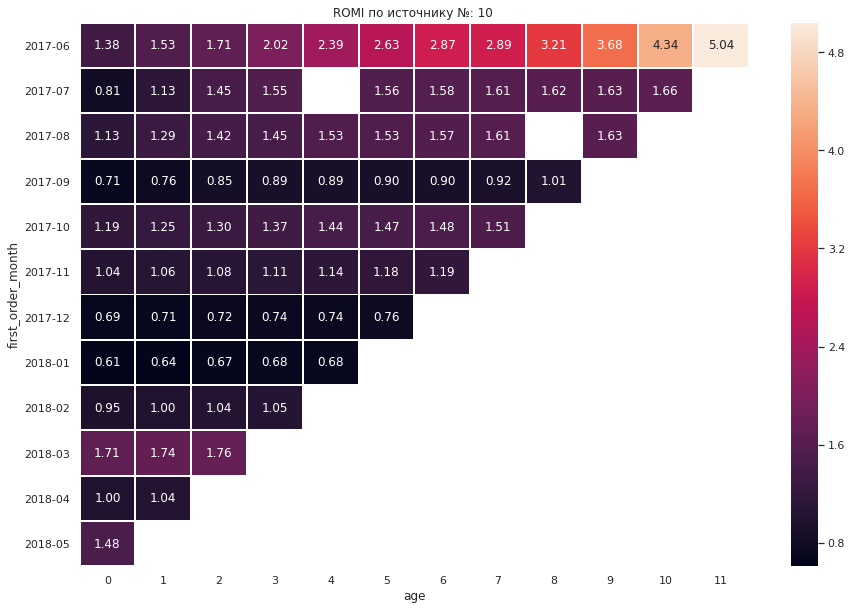

In [146]:
id_list=[1,2,3,4,5,9,10]
for i in id_list:
    visits1 = visits.query('source_id == @i')
    orders1 = orders.query('uid in @visits1.uid')

    first_orders1 = orders1.groupby('uid').agg({'order_month': 'min'}).reset_index()
    first_orders1.columns = ['uid', 'first_order_month']

    cohort_sizes1 = (first_orders1.groupby('first_order_month').agg({'uid': 'nunique'}).reset_index())
    cohort_sizes1.columns = ['first_order_month', 'n_buyers']

    orders_new1 = pd.merge(orders1, first_orders1, on='uid')
    
    cohorts1 = (orders_new1.groupby(['first_order_month', 'order_month']).agg({'revenue': 'sum'}).reset_index())
    
    report1 = pd.merge(cohort_sizes1, cohorts1, on='first_order_month') 

    margin_rate1 = 1

    report1['gp'] = report1['revenue'] * margin_rate1
    report1['age'] = (report1['order_month'] - report1['first_order_month']) / np.timedelta64(1, 'M')   
    report1['age'] = report1['age'].round().astype('int')
    report1['ltv'] = report1['gp'] / report1['n_buyers']


    monthly_costs1 = costs.query('source_id == @i').groupby('month').sum()
    
    report_new1 = pd.merge(report1, monthly_costs1, left_on='first_order_month', right_on='month')
    report_new1['cac'] = report_new1['costs'] / report_new1['n_buyers']
    report_new1['romi'] = report_new1['ltv'] / report_new1['cac']
    report_new1['first_order_month'] = report_new1['first_order_month'].dt.strftime('%Y-%m') ###
    
    output3 = report_new1.pivot_table(index='first_order_month', columns='age', values='romi', aggfunc='mean')

    romi1 = output3.cumsum(axis=1).round(2)
    romi1_mean = romi1.mean() ### добавим расчёт среднего ROMI
    romi1_mean6 = romi1[5].mean() ## 6 месяц жизни когорт, выведу дополнительную строку
    
    sns.set(style='white')
    plt.figure(figsize=(15, 10))
    plt.title("ROMI по источнику №: {0:.0f} ".format(i))
    
    romi_heatmap = sns.heatmap(romi1, annot=True, fmt ='.2f', linewidths=1, linecolor='white')
    
    print('-----------------------------------------------------------------------')
    print('Cредний ROMI по источнику №', i)
    print(romi1_mean.round(2))
    print('-----------------------------------------------------------------------')
    print(romi1_mean6.round(2),'- Cредний ROMI по источнику №',i, 'на 6 месяц жизни когорт')
    print('-----------------------------------------------------------------------')
    print('')
    print('')

Вывод по 2.3.3: Если брать период жизни когорт равный 6 месяцев, то самые успешные источники (по убыванию ROMI): №1, №9, №2

Посмотрим, как окупились расходы

In [147]:
costs_by_source.reset_index()

,source_id,costs
0,1,20833.27
1,2,42806.04
2,3,141321.63
3,4,61073.60
4,5,51757.10
5,9,5517.49
6,10,5822.49


In [148]:
revenue_by_source = (orders.merge(visits_by_source, on='uid', how='inner')).groupby('source_id').agg({'revenue':'sum'})
revenue_by_source.reset_index()

,source_id,revenue
0,1,31090.55
1,2,46923.61
2,3,54511.24
3,4,56696.83
4,5,52624.02
5,7,1.22
6,9,5759.40
7,10,4450.33


In [149]:
roi = revenue_by_source.join(costs_by_source)
roi['roi'] = (roi['revenue'] - roi['costs']) / roi['costs']
roi.sort_values('roi', ascending = False).round(2)

,revenue,costs,roi
source_id,,,
1,31090.55,20833.27,0.49
2,46923.61,42806.04,0.10
9,5759.40,5517.49,0.04
5,52624.02,51757.10,0.02
4,56696.83,61073.60,-0.07
10,4450.33,5822.49,-0.24
3,54511.24,141321.63,-0.61
7,1.22,NaN,NaN


Вывод: Лучший по окупаемости источник №1

Добавим обзор по платформе:

In [150]:
revenue_by_source_and_device = (orders.merge(visits_by_source, on='uid', how='inner'))\
                                .groupby(['source_id', 'device']).agg({'revenue':'sum'})
revenue_by_source_and_device = revenue_by_source_and_device.reset_index()

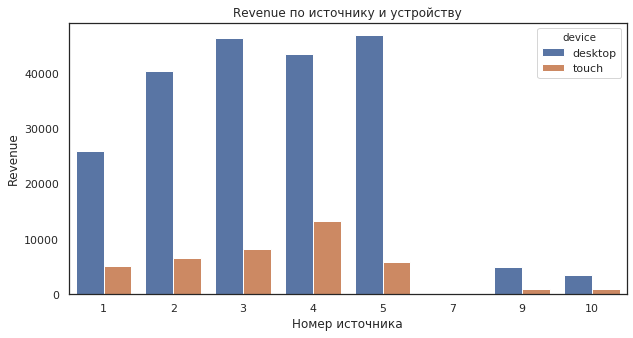

In [151]:
plt.figure(figsize = (10, 5))
ax = sns.barplot(x="source_id", y="revenue", hue="device", data=revenue_by_source_and_device)
plt.title('Revenue по источнику и устройству')
ax.set_xlabel('Номер источника')
ax.set_ylabel('Revenue')
plt.show()

Вывод: Очевидно, что можно увеличивать долю мобильных приложений и работать в этом поле. График показывает, что большинство заказов делаются со стационарных ПК

**3. Общий вывод:**

  Необходимо перераспределить вложения в рекламные каналы и сместить акцент с 3 канала, который особо убыточен для компании, на каналы 1 и 5, которые являются довольно перспективными, учитывая текущую отдачу при текущих вложениях. По 2, 3 и 4 каналам необходимо провести дополнительные исследования и выяснить причины настолько низкой конверсии в покупателя и проработать и провести необходимые мероприятия для исправления ситуации, т.к. в них мы также делаем довольно солидные рекламные вливания.

Очевидно, что можно увеличивать долю мобильных приложений и работать в этом поле. График показывает, что большинство заказов делаются со стационарных ПК

Если брать период жизни когорт равный 6 месяцев, то самые успешные источники (по убыванию **ROMI**): №1 - 6.17, №9 - 4.33, №2 - 3.34. **Маркетологам рекомендуется** продложить работу с этими источниками. От источника №3 - 1.02 рассмотреть возможность отказа от использования.

**Retention rate** низкий, составляет порядка **4%**. Бизнес является фактически одноразовым. Клиенты делатют 1-2 заказа и пропадают. На этом фоне выделяется 1 когорта, ее retention rate чуть выше - **6%**.  Необходимо тщательно изучить эту когорту: как они узнали о ресурсе, что заставляет их продолжать им пользоваться. Надо сделать опрос клиентов из других когорт, чтобы составить усредненный портрет клиента, который делает намного меньше покупок и котоорый с меньшей вероятностью вернется к использованию


**Средний LTV на 6 месяц жизни когорт** = 7.97

**Общие расходы** = 329131.62

**Cредний чек** = 5

**Среднее количество визитов в день** = 1.08

**Среднее количество покупок в день** = 1.08

**Средняя длинна сессии (мода)** = 1 минута

**Cредняя время покупки (мода)** - 1 минута

**Средняя стоимость привлечения клиента** = 10,2